In [1]:
# import basic utility packages
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

# import model training packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# import metrics packages
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# importing the visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the sample dataset
data = pd.read_excel('/Users/hargun/Desktop/Data/CM_ML_training.xlsx')
data.head()

,Subject ID,AC_x,AC_y,AC_z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PA_x,PA_y,PP_x,PP_y,CM_x,CM_y,CM_z
0,100307,-0.633,0.089,-5.297,-2.448,-22.021,0.310,-22.155,-12.926,5.728,-17.595,17.571,-31.907,-19.361,-9.78206,-19.0619,-1.66384
1,100408,0.689,0.215,-2.037,-0.456,-26.823,3.522,-26.804,-11.442,5.782,-17.566,18.661,-30.579,-23.307,-7.32496,-24.0915,2.92988
2,101107,-0.489,-1.771,-5.617,-1.504,-25.327,2.342,-25.391,-14.133,5.914,-19.314,16.540,-28.278,-20.461,-7.63225,-22.1851,-2.02365
3,101309,-1.036,-2.503,-1.416,-1.647,-26.022,0.466,-26.029,-12.983,5.493,-19.278,18.372,-30.592,-21.563,-7.98994,-22.4696,2.70457
4,101915,1.048,2.933,-7.443,-0.447,-21.629,1.748,-21.660,-11.126,8.203,-16.534,19.466,-27.702,-17.211,-6.63725,-18.8869,-3.30866


In [ ]:
# 2 by 2 plots to look at the variables 


In [3]:
# cleaning the dataset
subjectIDs = data['Subject ID']
data.drop("Subject ID", axis = 1, inplace = True)
data.head()

,AC_x,AC_y,AC_z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PA_x,PA_y,PP_x,PP_y,CM_x,CM_y,CM_z
0,-0.633,0.089,-5.297,-2.448,-22.021,0.310,-22.155,-12.926,5.728,-17.595,17.571,-31.907,-19.361,-9.78206,-19.0619,-1.66384
1,0.689,0.215,-2.037,-0.456,-26.823,3.522,-26.804,-11.442,5.782,-17.566,18.661,-30.579,-23.307,-7.32496,-24.0915,2.92988
2,-0.489,-1.771,-5.617,-1.504,-25.327,2.342,-25.391,-14.133,5.914,-19.314,16.540,-28.278,-20.461,-7.63225,-22.1851,-2.02365
3,-1.036,-2.503,-1.416,-1.647,-26.022,0.466,-26.029,-12.983,5.493,-19.278,18.372,-30.592,-21.563,-7.98994,-22.4696,2.70457
4,1.048,2.933,-7.443,-0.447,-21.629,1.748,-21.660,-11.126,8.203,-16.534,19.466,-27.702,-17.211,-6.63725,-18.8869,-3.30866


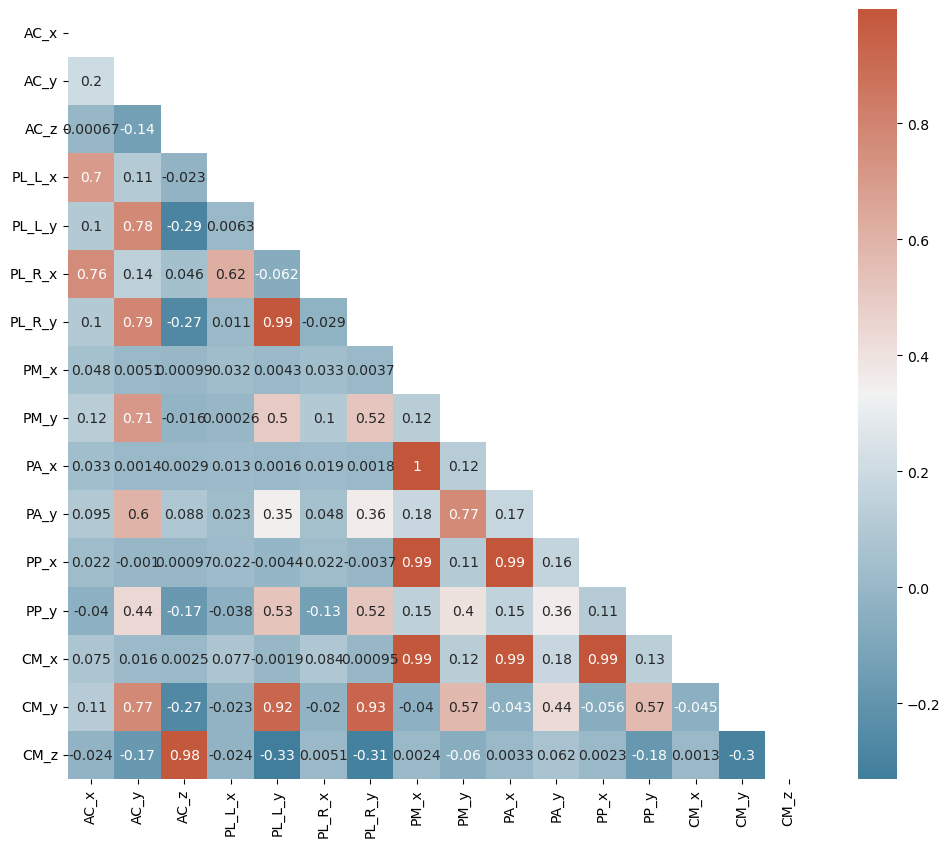

In [4]:
# plotting the correlation heatmap
corr = data.corr()
f, ax = plt.subplots(figsize = (12, 10))
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, annot = True, mask = mask, cmap = cmap)
plt.show()

In [5]:
# separating the independent and dependent variables
xData = data[['AC_x', 'AC_y', 'AC_z', 'PL_L_x', 'PL_L_y', 'PL_R_x', 'PL_R_y', 'PM_x', 'PM_y', 'PA_x', 'PA_y', 'PP_x', 'PP_y']]
yData = data[['CM_x', 'CM_y', 'CM_z']]

In [6]:
# feature engineering on xData
# NOT REQUIRED AS OF NOW (MAYBE IN FUTURE)

In [7]:
# train-test split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 0, test_size = 0.25, shuffle = True)

# resetting the indices
xTrain.reset_index(inplace = True, drop = True)
xTest.reset_index(inplace = True, drop = True)
yTrain.reset_index(inplace = True, drop = True)
yTest.reset_index(inplace = True, drop = True)

xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((148, 13), (50, 13), (148, 3), (50, 3))

In [8]:
# fitting the model to the dataset
model = LinearRegression()
model.fit(xTrain, yTrain)

# printing all the coefficients
coefficients = pd.DataFrame(model.coef_, columns = ['AC_x', 'AC_y', 'AC_z', 'PL_L_x', 'PL_L_y', 'PL_R_x', 'PL_R_y', 'PM_x', 'PM_y', 'PA_x', 'PA_y', 'PP_x', 'PP_y'], index = ['x', 'y', 'z'])
coefficients['Intercept'] = model.intercept_
coefficients

,AC_x,AC_y,AC_z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PA_x,PA_y,PP_x,PP_y,Intercept
x,-0.273924,-0.034690,-0.004051,0.423583,-0.019037,0.470642,-0.011741,0.134118,-0.012682,0.045832,0.060514,0.196224,0.054193,-0.574770
y,0.166170,0.029861,-0.004684,-0.144854,0.198705,0.005346,0.502801,0.000569,0.034406,0.038093,0.046639,-0.029065,0.039594,-4.938028
z,0.043436,0.066175,1.032520,0.195536,0.111608,-0.243219,-0.251922,0.057937,-0.070715,-0.050171,-0.004908,0.006410,0.027900,2.311726


In [9]:
# predicting the train data 
yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred', 'CM_y_pred', 'CM_z_pred'])

# consolidated train data
dataTrain = pd.concat([xTrain, yTrain, yPredTrain], axis = 1)
dataTrain.head()

,AC_x,AC_y,AC_z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PA_x,PA_y,PP_x,PP_y,CM_x,CM_y,CM_z,CM_x_pred,CM_y_pred,CM_z_pred
0,0.853,6.030,-8.372,-0.549,-19.366,2.337,-19.201,-11.366,14.044,-15.150,23.950,-23.576,-17.035,-5.94848,-16.6619,-6.38699,-6.019143,-16.960024,-5.531930
1,0.810,1.483,4.229,-1.530,-23.416,1.933,-23.416,-13.870,10.055,-20.781,19.709,-32.959,-22.967,-8.53844,-20.8687,8.86912,-9.342367,-20.459215,7.907047
2,0.508,-0.074,-5.468,-0.606,-22.598,2.550,-22.722,11.847,5.935,17.119,17.151,30.353,-22.665,8.55915,-21.2955,-2.08575,9.015023,-20.760425,-1.967714
3,0.975,2.493,-5.415,-1.096,-22.884,3.133,-22.798,13.304,8.492,18.982,19.279,28.917,-20.463,9.25086,-20.5207,-2.51859,9.085694,-20.239421,-2.121305
4,0.024,-0.363,-5.123,-1.504,-23.514,0.416,-23.671,-11.385,7.718,-16.270,22.174,-26.638,-16.508,-7.58767,-20.3798,-1.39448,-7.414029,-20.480877,-1.186487


In [10]:
# metrics calculations for train data
mseXTrain, mseYTrain, mseZTrain = mean_squared_error(dataTrain['CM_x'], dataTrain['CM_x_pred']), mean_squared_error(dataTrain['CM_y'], dataTrain['CM_y_pred']), mean_squared_error(dataTrain['CM_z'], dataTrain['CM_z_pred'])
print("Train Metrics:")
print("MSE X: " + str(mseXTrain))
print("MSE Y: " + str(mseYTrain))
print("MSE Z: " + str(mseZTrain))

Train Metrics:
MSE X: 0.49101828541388537
MSE Y: 0.31548410547697525
MSE Z: 0.4318027220366938


In [11]:
# predicting the test data 
yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred', 'CM_y_pred', 'CM_z_pred'])

# consolidated test data
dataTest = pd.concat([xTest, yTest, yPredTest], axis = 1)
dataTest.head()

,AC_x,AC_y,AC_z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PA_x,PA_y,PP_x,PP_y,CM_x,CM_y,CM_z,CM_x_pred,CM_y_pred,CM_z_pred
0,-0.206,1.845,2.683,-1.218,-21.628,1.753,-21.177,-13.120,6.948,-18.348,15.792,-27.891,-18.056,-6.60714,-19.9454,6.511340,-7.808163,-19.324425,6.360710
1,1.436,1.725,-5.321,-0.234,-23.159,3.106,-23.326,12.374,7.794,18.604,19.562,32.449,-19.666,8.98544,-20.8269,-2.157700,9.969713,-20.728167,-1.719674
2,0.975,2.493,-5.415,-1.096,-22.884,3.133,-22.798,-11.879,8.623,-16.394,17.933,-29.372,-21.566,-6.95743,-19.8588,-2.132760,-7.493748,-20.009112,-2.212566
3,0.051,2.234,-4.225,-0.474,-25.774,2.149,-26.194,10.553,8.763,15.951,21.507,28.995,-22.272,8.33527,-22.9517,-0.538357,8.778995,-22.861083,-0.143336
4,0.548,0.498,-3.896,-0.787,-21.461,2.853,-21.582,-10.073,6.726,-17.064,18.858,-27.140,-22.472,-6.91366,-19.0378,-1.310950,-6.675571,-19.446215,-0.556845


In [12]:
# metrics calculations for test data
mseXTest, mseYTest, mseZTest = mean_squared_error(dataTest['CM_x'], dataTest['CM_x_pred']), mean_squared_error(dataTest['CM_y'], dataTest['CM_y_pred']), mean_squared_error(dataTest['CM_z'], dataTest['CM_z_pred'])
print("Test Metrics:")
print("MSE X: " + str(mseXTest))
print("MSE Y: " + str(mseYTest))
print("MSE Z: " + str(mseZTest))

Test Metrics:
MSE X: 0.5120464610441277
MSE Y: 0.3126649634710617
MSE Z: 0.3564867917527892


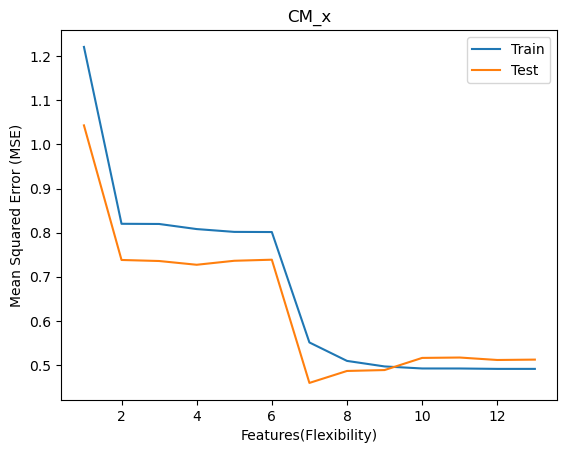

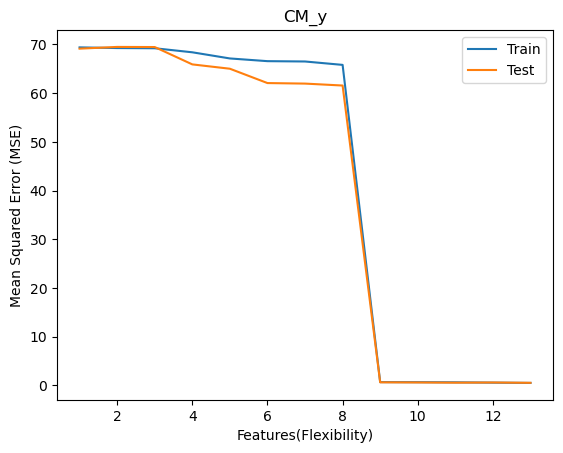

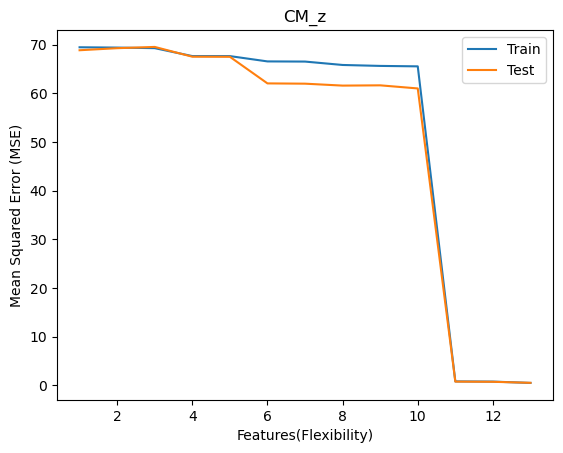

In [13]:
# analysis by removing irrelevant features one by one
xCoefficients = ['PL_R_y', 'PL_L_y', 'AC_z', 'AC_y', 'AC_x', 'PL_L_x', 'PL_R_x', 'PM_y', 'PP_y', 'PA_y', 'PA_x', 'PP_x', 'PM_x']
coefficientsMSETrainX = []
coefficientsMSETestX = []

yCoefficients = ['PL_R_x', 'PL_L_x', 'PM_x', 'PA_x', 'PP_x', 'AC_x', 'AC_z', 'PA_y', 'PP_y', 'PM_y', 'AC_y', 'PL_L_y', 'PL_R_y']
coefficientsMSETrainY = []
coefficientsMSETestY = []

zCoefficients = ['PP_x', 'PM_x', 'PA_x', 'PL_R_x', 'PL_L_x', 'AC_x', 'PM_y', 'PA_y', 'AC_y', 'PP_y', 'PL_R_y', 'PL_L_y', 'AC_z']
coefficientsMSETrainZ = []
coefficientsMSETestZ = []

while(len(xCoefficients) > 0):
    
    # Running the pipeline for CM_x    
    # separating the independent and dependent variables
    xData = data[xCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 0, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = LinearRegression()
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainX.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestX.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    xCoefficients.pop(0)
    
    # Running the pipeline for CM_y    
    # separating the independent and dependent variables
    xData = data[yCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 0, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = LinearRegression()
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainY.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestY.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    yCoefficients.pop(0)
    
    # Running the pipeline for CM_z    
    # separating the independent and dependent variables
    xData = data[zCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 0, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = LinearRegression()
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainZ.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestZ.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    zCoefficients.pop(0)

f, axs = plt.subplots()
axs.plot(np.arange(13, 0, -1), coefficientsMSETrainX, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(13, 0, -1), coefficientsMSETestX, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_x")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

f, axs = plt.subplots()
axs.plot(np.arange(13, 0, -1), coefficientsMSETrainY, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(13, 0, -1), coefficientsMSETestY, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_y")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

f, axs = plt.subplots()
axs.plot(np.arange(13, 0, -1), coefficientsMSETrainZ, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(13, 0, -1), coefficientsMSETestZ, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_z")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

plt.show()